# Свёрточные нейронные сети: Применение

В данной лабораторной работы необходимо:

- Реализовать вспомогательные функции для построения TensorFlow model
- Построить ConvNet с использованием TensorFlow 

**Навыки, которые можно получить по результатом выполнения заданий:**

- Построение и обучение ConvNet в TensorFlow для задачи классификации

`Данный материал опирается и использует материалы курса Deep Learning от организации deeplearning.ai`
 
 Ссылка на основной курс (для желающих получить сертификаты): https://www.coursera.org/specializations/deep-learning

## 1.0 - TensorFlow model

In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [5]:
# Загрузка данных (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Набор данных SIGNS представляет собой коллекцию из 6 знаков, представляющих числа от 0 до 5.

<img src="images/SIGNS.png" style="width:800px;height:300px;">


В следующей ячейке показан пример размечанного изображения в наборе данных. Можете изменить значение `index` ниже и повторить, чтобы увидеть различные примеры. 

y = 2


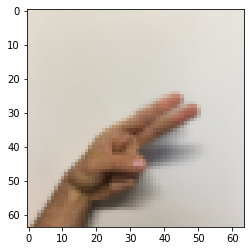

In [9]:
# Примеры изображений
index = 2
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [10]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### 1.1 - Создание placeholders

TensorFlow требует, чтобы вы создали placeholders для входных данных, которые будут подаваться в модель при запуске session.

**Упражнение**: 
Реализуйте функцию, описанную ниже, для создания placeholders для входного изображения X и выходного Y. На данный момент не следует определять количество обучающих примеров. Для этого можно использовать "None" в качестве размера батча, это даст возможность выбора в дальнейшем. Следовательно, X должна быть размерностью **[None, n_H0, n_W0, n_C0]**, а Y должна быть размерностью **[None, n_y]**.  [Подсказка: почитать в документации tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

In [11]:
# ОЦЕНИВАЕМОЕ: create_placeholders

def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Создание placeholders для tensorflow session.
    
    Arguments:
    n_H0 -- скаляр, высота (height) входного изображения
    n_W0 -- скаляр, ширина (width) входного изображения
    n_C0 -- скаляр, количество каналов
    n_y -- скаляр, количество классов
        
    Returns:
    X -- placeholder для входных данных, размер [None, n_H0, n_W0, n_C0] и dtype "float"
    Y -- placeholder для входных меток, размер [None, n_y] и dtype "float"
    """

    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (≈2 строки кода)
    X = None
    Y = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###
    
    return X, Y

In [ ]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

**Ожидаемый выход**

<table> 
<tr>
<td>
    X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)

</td>
</tr>
<tr>
<td>
    Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)

</td>
</tr>
</table>

### 1.2 - Инициализация параметров

Необходимо инициализировать веса/фильтры $W1$ и $W2$, используя `tf.contrib.layers.xavier_initializer(seed = 0)`. Не нужно беспокоиться о переменных со смещением, так как функции TensorFlow позаботятся о смещении. Обратите также внимание, что необходимо инициализировать только веса/фильтры для функций conv2d. TensorFlow инициализирует слои для полностью подключенной части автоматически.

**Упражнение:** Реализуйте функцию initialize_parameters(). Размеры для каждой группы фильтров приведены ниже. Напоминание - для инициализации параметра $W$ формы [1,2,3,4] в Tensorflow, используйте:
```python
W = tf.get_variable("W", [1,2,3,4], initializer = ...)
```
#### tf.get_variable()
[почитайте в документации tf.get_variable](https://www.tensorflow.org/api_docs/python/tf/get_variable). 

Необходимо использовать эту функцию для создания переменной tensorflow с указанным именем, но если переменные уже существуют, то она получит существующую переменную с таким же именем.

In [12]:
# ОЦЕНИВАЕМОЕ: initialize_parameters

def initialize_parameters():
    """
    Инициализация весов для построения нейронной сети в tensorflow. Размеры:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- dictionary тензоров содержащий W1, W2
    """
    
    tf.set_random_seed(1)  
        
    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (2 строки кода)
    W1 = None
    W2 = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [ ]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1[1,1,1] = \n" + str(parameters["W1"].eval()[1,1,1]))
    print("W1.shape: " + str(parameters["W1"].shape))
    print("\n")
    print("W2[1,1,1] = \n" + str(parameters["W2"].eval()[1,1,1]))
    print("W2.shape: " + str(parameters["W2"].shape))

** Ожидаемый выход:**

```
W1[1,1,1] = 
[ 0.00131723  0.14176141 -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W1.shape: (4, 4, 3, 8)


W2[1,1,1] = 
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]
W2.shape: (2, 2, 8, 16)
```

### 1.3 - Прямое распространение

В TensorFlow, есть встроенные функции, которые реализуют шаги свертки для вас.

- **tf.nn.conv2d(X,W, strides = [1,s,s,1], padding = 'SAME'):** на входеt $X$ и группа фильтров $W$, это свёртка $W$ фильтров с X. Третий параметр ([1,s,s,1]) представляет собой шаги для каждого измерения входа (m, n_H_prev, n_W_prev, n_C_prev). Обычно для количества примеров (первое значение) и для каналов (четвертое значение) выбирается шаг 1, поэтому значение записано как `[1,s,s,1]`. Можно прочитать полную документацию по [conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d).

- **tf.nn.max_pool(A, ksize = [1,f,f,1], strides = [1,s,s,1], padding = 'SAME'):** при вводе значения A эта функция использует окно размера (f, f) и шаги размера (s, s) для выполнения максимального объединения над каждым окном.  Для максимального объединения, как правило, работают с одним примером за раз и на одном канале за раз.  Так что первое и четвертое значение в `[1,f,f,1]` - это и то, и другое. Можно прочитать полную документацию на тему [max_pool](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool).

- **tf.nn.relu(Z):** вычисляет поэлементный ReLU по Z (который может быть любой формы). Можно прочитать полную документацию на тему [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu).

- **tf.contrib.layers.flatten(P)**: при тензоре "P" эта функция берет каждый пример из обучения (или теста) в выборке и сплющивает его в 1D вектор.  
    * Если тензор P имеет форму (m,h,w,c), где m - количество примеров (размер выборки), то он возвращает сплющенный тензор с формой (batch_size, k), где $k=h \times w \times c$. "k" равно произведению всех размеров, отличных от первого.
    * Например, при наличии тензора с размерами [100,2,3,4], он уплотняет тензор до формы [100, 24], где 24 = 2 * 3 * 4. Полную документацию можно прочитать на [flatten](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/flatten).

- **tf.contrib.layers.fully_connected(F, num_outputs):** учитывая сплющенный вход F, он возвращает выход, рассчитанный с помощью полносвязного слоя. Полную документацию можно прочитать на [full_connected](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/fully_connected).


В последней функции выше (`tf.contrib.layers.full_connected`), полностью подключенный слой автоматически инициализирует веса и продолжает их тренировать по мере того, как вы тренируете модель. Следовательно, вам не нужно было инициализировать эти веса при инициализации параметров.

#### Window, kernel, filter
Слова "window", "kernel" и "filter" используются для обозначения одного и того же понятия.  Поэтому параметр `ksize` относится к "kernel size", используется `(f,f)` для обозначения размера "filter".  И "kernel", и "filter" относятся к "window".

**Упражнение**
Реализуйте `forward_propagation`: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED`. 

Подробно мы будем использовать следующие параметры для всех шагов:
 - Conv2D: stride 1, padding - "SAME"
 - ReLU
 - Max pool: 8 на 8 "filter" size и 8 на 8 stride, padding - "SAME"
 - Conv2D: stride 1, padding - "SAME"
 - ReLU
 - Max pool: 4 на 4 "filter" size и 4 на 4 stride, padding - "SAME"
 - Flatten по предыдущему выходу.
 - FULLYCONNECTED (FC) слой: Необходимо сделать полносвязнный слой без функции нелинейной активации. Не вызывайте softmax здесь. В результате в выходном слое будет 6 нейронов, которые затем будут переданы в softmax. В TensorFlow функции softmax и стоимости объединяются в одну функцию, которую вы будете вызывать при вычислении стоимости.

In [13]:
# ОЦЕНИВАЕМОЕ: forward_propagation

def forward_propagation(X, parameters):
    """
    Прямое распространение для модели:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- входной датасет из placeholder, размером (input size, number of examples)
    parameters -- python dictionary с параметрами "W1", "W2", получаемые из функции initialize_parameters

    Returns:
    Z3 -- выход последнего LINEAR нейрона, без функции активации
    """
    
    # Извлечение параметров из "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ###
    # CONV2D: stride = 1, padding 'SAME'
    Z1 = None
    # RELU
    A1 = None
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = None
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = None
    # RELU
    A2 = None
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = None
    # FLATTEN
    F = None
    # FULLY-CONNECTED без non-linear функции активации (не нужно вызывать softmax).
    # 6 нейронов в выходном слое. Подсказка: один аргумент должен быть "activation_fn=None" 
    Z3 = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###

    return Z3

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = \n" + str(a))

**Ожидаемый выход**:

```
Z3 = 
[[-0.44670227 -1.57208765 -1.53049231 -2.31013036 -1.29104376  0.46852064]
 [-0.17601591 -1.57972014 -1.4737016  -2.61672091 -1.00810647  0.5747785 ]]
```

### 1.4 - Вычисление потерь


Выполните функцию расчета затрат, описанную ниже. Помните, что функция затрат помогает нейронной сети увидеть, насколько предсказания модели отличаются от правильных меток.  Регулируя веса сети для снижения потерь, нейронная сеть может улучшить свои предсказания.

Можно использовать две вспомогательные функции: 

- **tf.nn.softmax_cross_entropy_with_logits(logits = Z, labels = Y):** вычисляет softmax entropy loss. Эта функция рассчитывает как функцию активации softmax, так и результирующие потерю. Полную документацию можно прочитать на [softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits).
- **tf.reduce_mean:** вычисляет среднее значение элементов по размерам тензора. Используйте его для расчета суммы потерь по всем примерам, чтобы получить общую стоимость. Полную документацию можно прочитать на [reduce_mean](https://www.tensorflow.org/api_docs/python/tf/reduce_mean).

#### Детально о softmax_cross_entropy_with_logits
* Softmax используется для форматирования выходных данных, чтобы их можно было использовать для классификации.  Он присваивает значение между 0 и 1 для каждой категории, где сумма всех прогнозируемых значений (по всем возможным категориям) равна 1.
* Cross Entropy сравнивает предсказанные классификации модели с фактическими метками и приводит к числовому значению, представляющему "потерю" предсказаний модели.
* "Logits" - это результат умножения весов и добавления смещений.  "Logits" передаются через функцию активации (например, relu), а результат называется "активация".
* Функция называется `softmax_cross_entropy_with_logits` принимает на вход "Logits" (а не активации); затем использует модель для предсказания с помощью Softmax, а затем сравнивает предсказания с истинными метками с помощью Cross Entropy.  Это делается с помощью одной функции для оптимизации вычислений.

**Упражнение**: Вычислите потери в функции ниже.

In [14]:
# ОЦЕНИВАЕМОЕ: compute_cost 

def compute_cost(Z3, Y):
    """
    Вычисление потерь
    
    Arguments:
    Z3 -- выход с прямого распространения (LINEAR unit), размер (number of examples, 6)
    Y -- "true" вектор меток placeholder, такого же размера как и Z3
    
    Returns:
    cost - Tensor функции потерь
    """
    
    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (1 строка кода)
    cost = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###
    
    return cost

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

**Ожидаемый выход**: 
```
cost = 2.91034
```

## 1.5 Модель 

Наконец, необходимо объеденить вспомогательные функции, которые реализовали ранее, чтобы построить модель. Необходимо будет обучать ее на наборе данных SIGNS. 

**Упражнение**: Выполните функцию ниже 

В моделе ниже должны использоваться:

- create placeholders
- initialize parameters
- forward propagate
- compute the cost
- create an optimizer

Наконец, необходимо создать session и запустите for-loop для каждой эпохи из num_epochs, получите мини-пакеты, а затем для каждой мини-пакеты оптимизируете функцию. [Hint for initializing the variables](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer)

#### Adam Optimizer
Можно использовать `tf.train.AdamOptimizer(learning_rate = ...)` в качества оптимизатора.  Optimizer -`minimize(loss=...)` функция, которая будет вызываться для установки функции затрат, которую оптимизатор будет минимизировать.
Полную документацию можно прочитать на [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer)

#### Случайные mini-batches
```Python
minibatches = random_mini_batches(X, Y, mini_batch_size = 64, seed = 0)
```

#### Оценка работы оптимизатора и потерь

В цикле, для каждой mini-batch необходимо использовать объект `tf.Session` (по имени `sess`) для подачи mini-batch входов и меток в нейронную сеть и оценки тензоров для оптимизатора, а также стоимости.  Помните, что ранее было построена структура данных в виде графа и на вход которого должны подаваться входы и метки, а также использоваться `sess.run()`.

Синтаксис:
```
output_for_var1, output_for_var2 = sess.run(
                                                fetches=[var1, var2],
                                                feed_dict={var_inputs: the_batch_of_inputs,
                                                           var_labels: the_batch_of_labels}
                                                )
```

* Обратите внимание, что `sess.run` принимает свой первый аргумент `fetches` как список объектов, которые вы хотите, чтобы он оценивал (в данном случае, мы хотим оценить оптимизатор и стоимость).  
* Он также берет словарь для параметра `feed_dict`.  
* Ключами являются переменные `tf.placeholder`, которые мы создали в функции `create_placeholders` выше.  
* Значения - это переменные, содержащие действительные нумерованные массивы для каждой мини-группы.  
* sess.run выводит кортеж оцениваемых тензоров в том же порядке, что и список, заданный для `fetches`.

Полную документацию можно прочитать на [tf.Sesssion#run](https://www.tensorflow.org/api_docs/python/tf/Session#run).

In [16]:
# ОЦЕНИВАЕМОЕ: model

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
    """
    Реализация трёх-слойной ConvNet в Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- обучающая выборка примеров, рамер (None, 64, 64, 3)
    Y_train -- обучающая выборка меток, рамер (None, n_y = 6)
    X_test -- тестовая выборка примеров, рамер (None, 64, 64, 3)
    Y_test -- тестовая выборка меток, рамер (None, n_y = 6)
    learning_rate -- скорость градиентного спуска
    num_epochs -- количество эпох
    minibatch_size -- размер minibatch
    print_cost -- True для печати каждые 100 эпох
    
    Returns:
    train_accuracy -- действительное число, точность на обучающей выборке (X_train)
    test_accuracy -- действительное число, точность на тестовой выборке (X_test)
    parameters -- обученные параметры модели, которые будут использоваться для предсказания
    """
    
    ops.reset_default_graph()  
    tf.set_random_seed(1)  
    seed = 3    
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []  
    
    # Сооздание Placeholders с корректным размером
    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (1 строка кода)
    X, Y = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###

    # Инициализация параметров
    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (1 строка кода)
    parameters = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###
    
    # Прямое распространение: Построение с использованием tensorflow graph
    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (1 строка кода)
    Z3 = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###
    
    # Функция потерь: Добавление функции потерь в tensorflow graph
    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (1 строка кода)
    cost = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###
    
    # Обратное распространение: Определение tensorflow optimizer. Используется AdamOptimizer для минимизации потерь.
    ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (1 строка кода)
    optimizer = None
    ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###
    
    # Инициализация всех глобавльных переменных
    init = tf.global_variables_initializer()
     
    # Начало session для вычисления tensorflow graph
    with tf.Session() as sess:
        
        # Инициализация
        sess.run(init)
        
        # Эпохи обучения
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # количество minibatches к размеру minibatch_size в обучающем наборе
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Выбор minibatch
                (minibatch_X, minibatch_Y) = minibatch
                """
                # Строка, которая управляет графом на minibatch.
                # Запуск session расчёт optimizer и cost.
                # feedict должен содержать minibatch для (X,Y).
                """
                ### НАЧАЛО ВАШЕГО КОДА ЗДЕСЬ ### (1 строка кода)
                _ , temp_cost = None
                ### ОКОНЧАНИЕ ВАШЕГО КОДА ЗДЕСЬ ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Вывод каждые 100 эпох
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # Отрисовка графика потерь
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Вычисление корректных предсказаний
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Вычисление точности
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

Запустите следующую ячейку, чтобы обучить вашу модель 100 эпохам. Проверьте, соответствует ли Ваша стоимость после эпохи 0 и 5, той, которая в таблице ниже. Если нет, остановите ячейку и вернитесь к коду!

In [ ]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)

**Ожидаемый выход**:
<table> 
<tr>
    <td> 
    **Cost after epoch 0 =**
    </td>
    <td> 
      1.917929
    </td> 
</tr>
<tr>
    <td> 
    **Cost after epoch 5 =**
    </td>
    <td> 
      1.506757
    </td> 
</tr>
<tr>
    <td> 
    **Train Accuracy   =**
    </td>
    <td> 
      0.940741
    </td> 
</tr> 

<tr>
    <td> 
    **Test Accuracy   =**
    </td>
    <td> 
      0.783333
    </td> 
</tr> 
</table>

In [ ]:
fname = "images/thumbs_up.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))
plt.imshow(my_image)